In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
datasets.get_data_home()

'C:\\Users\\Papoun\\scikit_learn_data'

In [2]:
mnist = datasets.fetch_openml(name='mnist_784', version=1, parser="auto")

In [3]:
mnist.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.target.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
X = mnist.data.loc[::50,:]
y = mnist.target.loc[::50]

In [17]:
X.shape

(1400, 784)

In [18]:
y.shape

(1400,)

In [19]:
y.unique()

['5', '3', '4', '1', '8', '9', '2', '7', '0', '6']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [20]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def visu(idx):
    sample = np.reshape(X.loc[idx, :], (28,28))
    plt.imshow(sample, cmap='binary')

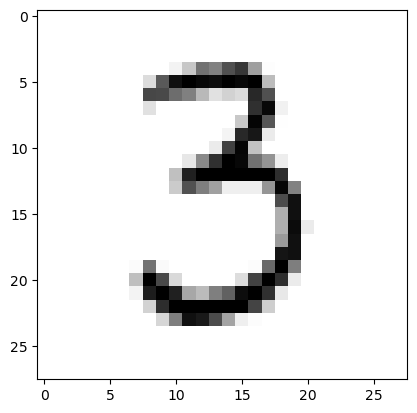

In [23]:
visu(50)

In [24]:
n_clusters = len(list(y.unique()))
n_clusters

10

In [25]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,...,1400.00,1400.00,1400.00,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0,1400.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.05,-0.05,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.05,-0.05,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.05,-0.05,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.05,-0.05,-0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.34,25.11,26.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(X_scaled)
kmeans.labels_

C:\Users\Papoun\anaconda3\envs\projet5\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Papoun\anaconda3\envs\projet5\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


array([2, 2, 9, ..., 6, 7, 7])

In [53]:
db = cluster.DBSCAN(eps=10, min_samples=4)
ret = db.fit(X_scaled)
np.unique(db.labels_)

array([-1,  0,  1], dtype=int64)

In [162]:
len(np.unique(kmeans.labels_))

10

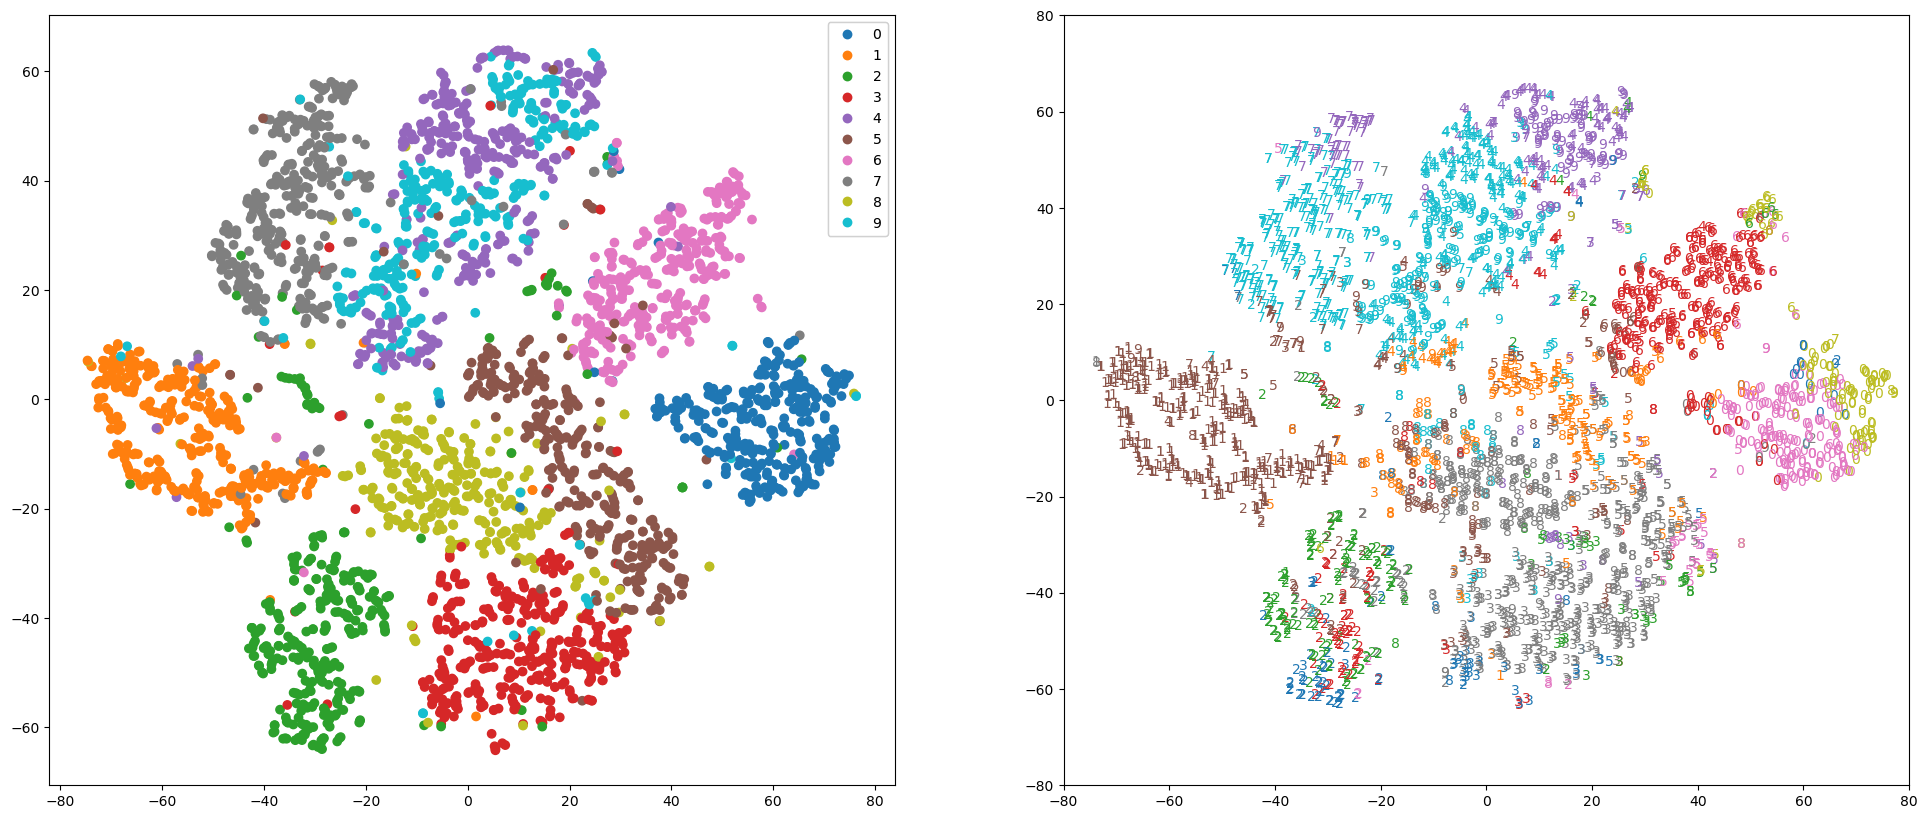

PCA Explaine variance ratio: 0.822603389491774 with 50 components
Coef de silhouette du kmean: -0.0017600494983650578
Rand score du kmean: 0.8586890948434247


In [170]:
from sklearn import decomposition
from sklearn import manifold
from sklearn import metrics

n_components = 50
pca = decomposition.PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

tsne = manifold.TSNE(n_components=2, n_iter=800, perplexity=15)

colors = list(y.astype('int'))

X_tsne = tsne.fit_transform(X_pca)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(24, 10))

s1 = ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=list(y.astype('int')), cmap='tab10')
legend1 = ax1.legend(*s1.legend_elements())
ax1.add_artist(legend1)


ax2.set_xlim(xmin=-80, xmax=80)
ax2.set_ylim(ymin=-80, ymax=80)
for i in  range(len(y)):
    ax2.text(X_tsne[i, 0], X_tsne[i, 1],
            list(y)[i],
            color=plt.cm.tab10(kmeans.labels_[i])
            )
plt.show()


# Evaluations
ratio = np.sum(pca.explained_variance_ratio_)
print(f'PCA Explaine variance ratio: {ratio} with {n_components} components')

silhouette = metrics.silhouette_score(X=X_scaled, labels=kmeans.labels_)
print(f'Coef de silhouette du kmean: {silhouette}')

rand_score = metrics.rand_score(labels_true=y, labels_pred=kmeans.labels_)
print(f'Rand score du kmean: {rand_score}')